# Terra - Pulses
## Getting Started with Pulses
https://qiskit.org/documentation/tutorials/advanced/index.html

## Additional Useful Tutorial Links
1. Obtaining Information about your backend https://qiskit.org/documentation/tutorials/advanced/terra/pulse/gathering_system_information.html

2. Building Pulse Instructions https://qiskit.org/documentation/tutorials/advanced/terra/pulse/building_pulse_instructions.html

3. Calibrating Qubits with Qiskit Pulse
https://qiskit.org/textbook/ch-quantum-hardware/calibrating-qubits-openpulse.html

In [1]:
from qiskit.pulse import Schedule

sched = Schedule(name='getting_started')

In [2]:
from qiskit.pulse import SamplePulse
my_pulse = SamplePulse([0.00043, 0.0007 , 0.00112, 0.00175, 0.00272, 0.00414, 0.00622,
                        0.00919, 0.01337, 0.01916, 0.02702, 0.03751, 0.05127, 0.06899,
                        0.09139, 0.1192 , 0.15306, 0.19348, 0.24079, 0.29502, 0.35587,
                        0.4226 , 0.49407, 0.56867, 0.64439, 0.71887, 0.78952, 0.85368,
                        0.90873, 0.95234, 0.98258, 0.99805, 0.99805, 0.98258, 0.95234,
                        0.90873, 0.85368, 0.78952, 0.71887, 0.64439, 0.56867, 0.49407,
                        0.4226 , 0.35587, 0.29502, 0.24079, 0.19348, 0.15306, 0.1192 ,
                        0.09139, 0.06899, 0.05127, 0.03751, 0.02702, 0.01916, 0.01337,
                        0.00919, 0.00622, 0.00414, 0.00272, 0.00175, 0.00112, 0.0007 ,
                        0.00043],
                       name="short_gaussian_pulse")

In [3]:
from qiskit.pulse import Play, DriveChannel

qubit_idx = 0
sched = sched.insert(0, Play(my_pulse, DriveChannel(qubit_idx)))

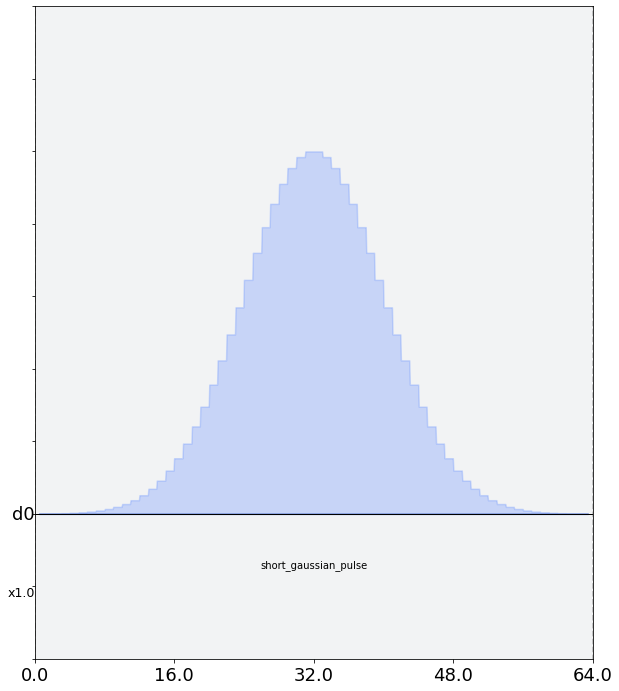

In [4]:
sched.draw(label=True)

In [6]:
from qiskit.test.mock import FakeAlmaden

backend = FakeAlmaden()

In [7]:
from qiskit.scheduler.utils import measure_all

sched = sched.insert(sched.duration, measure_all(backend))

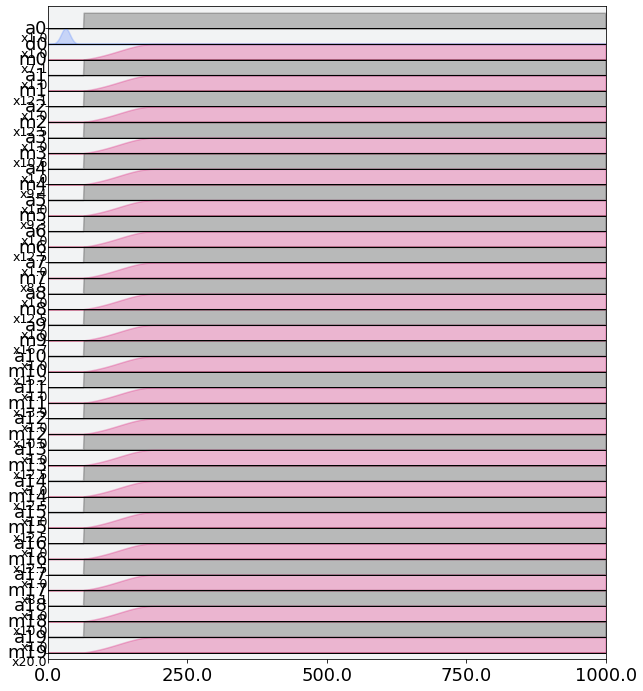

In [8]:
sched.draw(plot_range=[0, 1000])

In [11]:
from qiskit import IBMQ, execute
backend = IBMQ.load_account().get_backend(open_pulse=True)
job = execute(sched, backend)

result = job.result()

ibmqfactory.load_account:WARNING:2020-04-29 11:22:31,132: Credentials are already in use. The existing account in the session will be replaced.
/Users/worknic/opt/anaconda3/envs/test/lib/python3.8/site-packages/qiskit/compiler/transpile.py:174: UserWarning: Transpiling schedules is not supported yet.
  warnings.warn("Transpiling schedules is not supported yet.", UserWarning)


KeyboardInterrupt: 

## Building Pulse Schedules

In [26]:
from qiskit.pulse import Schedule, Play, ConstantPulse, Delay, DriveChannel

sched_a = Schedule(name="A")
sched_b = Schedule(name="B")

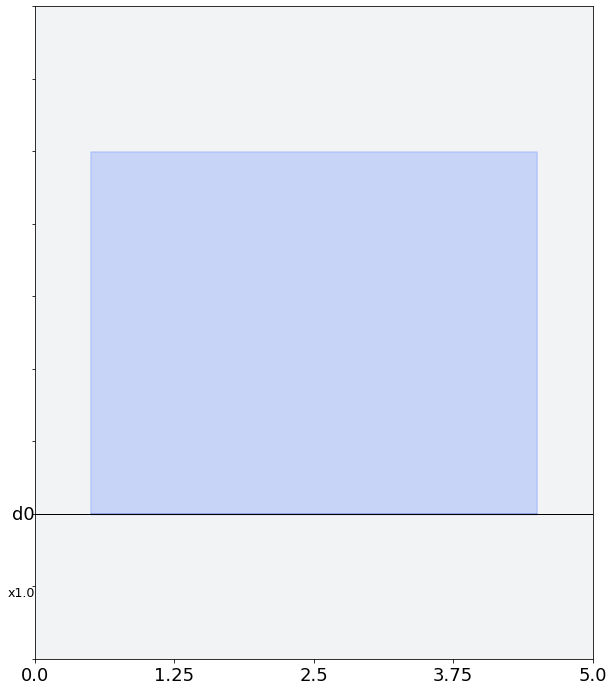

In [27]:
sched_a = sched_a.insert(0, Play(ConstantPulse(duration=5, amp=1), DriveChannel(0)))
sched_b |= Play(ConstantPulse(duration=5,amp=-1), DriveChannel(0))

sched_a.draw()

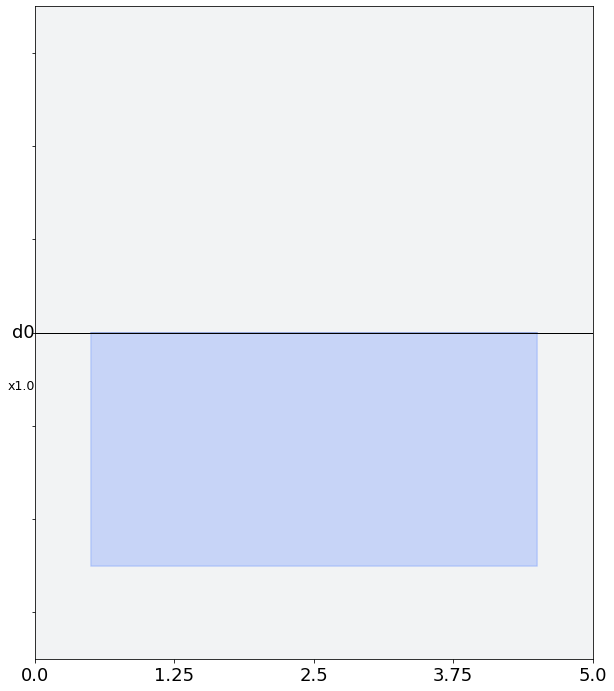

In [28]:
sched_b.draw()

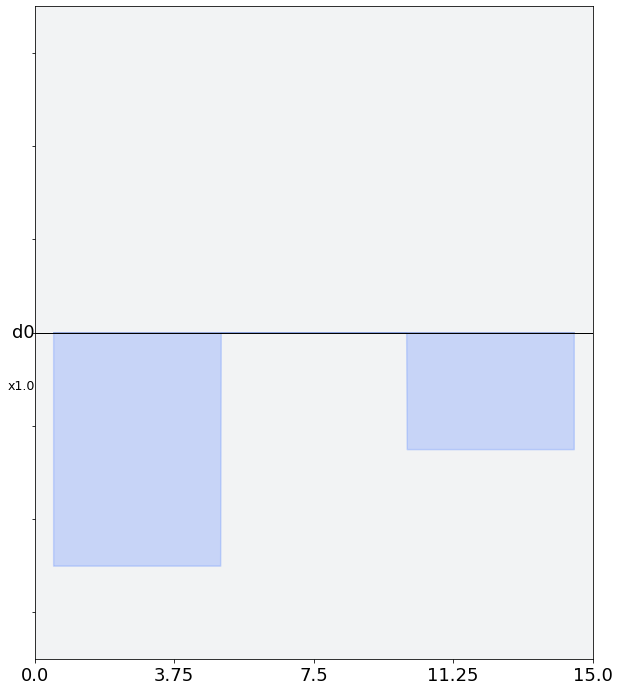

In [29]:
sched_a |= Play(ConstantPulse(duration=5, amp=0.5), DriveChannel(0)).shift(10)
sched_b |= Play(ConstantPulse(duration=5, amp=-0.5), DriveChannel(0)) << 10

sched_b.draw()

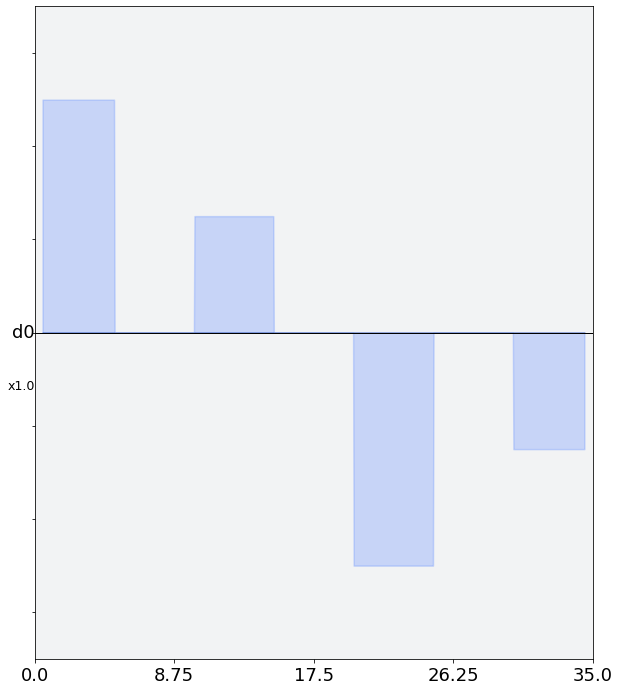

In [30]:
sched_a_and_b = sched_a.insert(20, sched_b)
sched_b_and_a = sched_b | sched_a << 20

sched_a_and_b.draw()

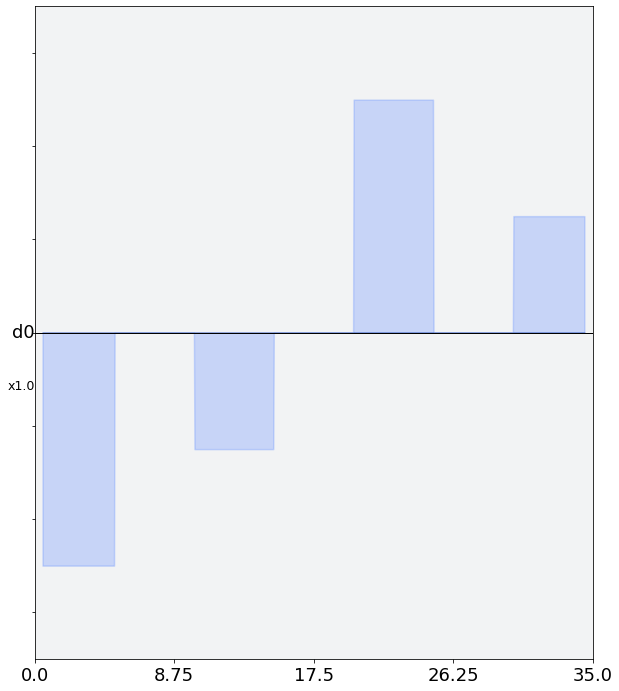

In [31]:
sched_b_and_a.draw()

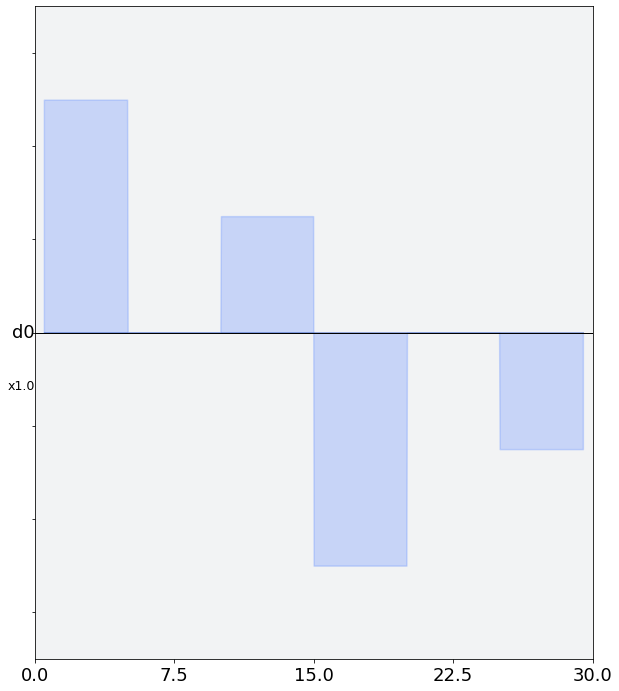

In [33]:
sched_a_plus_b = sched_a.append(sched_b)

sched_a_plus_b.draw()

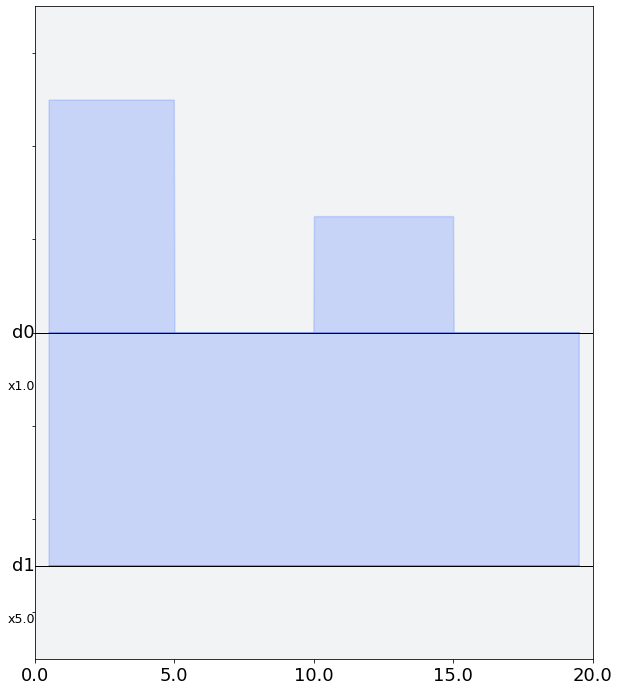

In [35]:
sched_a_plus_c = sched_a + Play(ConstantPulse(duration=20, amp=0.2), DriveChannel(1))

sched_a_plus_c.draw()

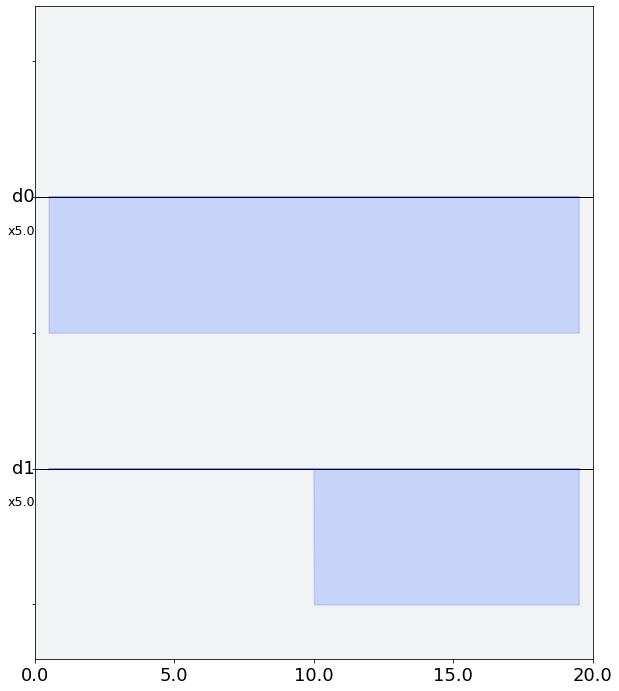

In [37]:
sched_d = Play(ConstantPulse(duration=20, amp=-0.2), DriveChannel(0)) \
            + (Play(ConstantPulse(duration=10, amp=-0.2), DriveChannel(1)) << 10)

sched_d.draw()

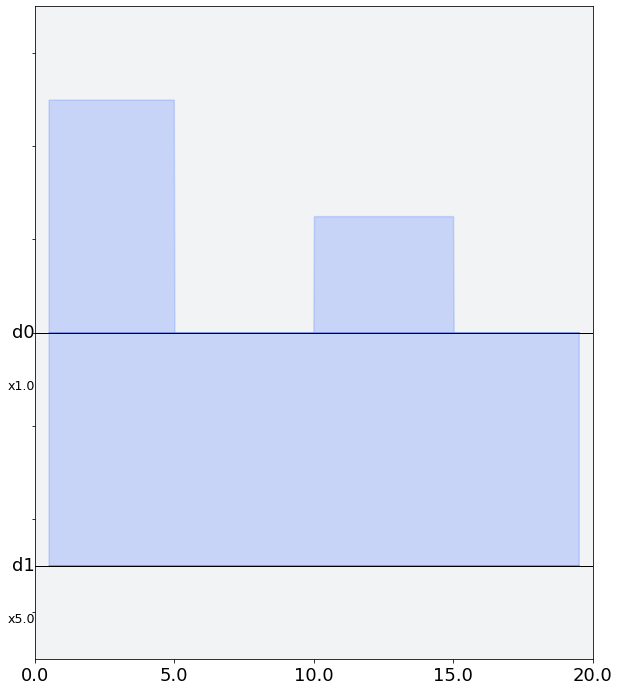

In [40]:
sched_a_plus_c.draw()

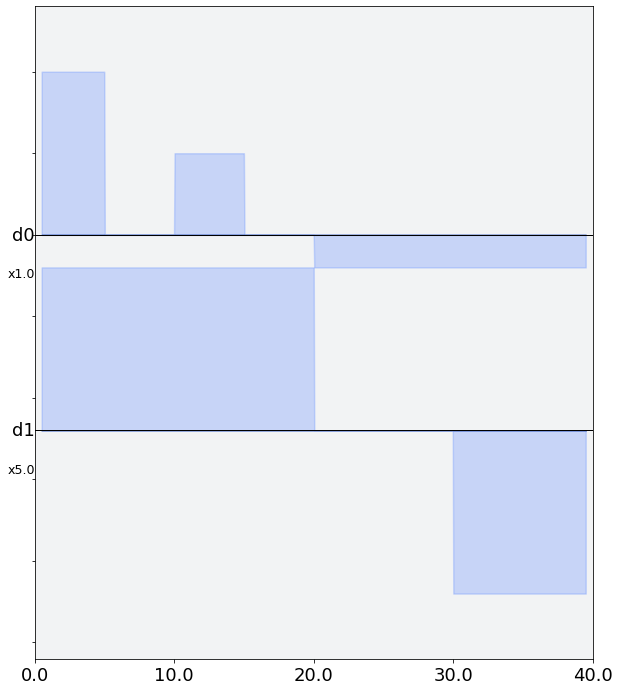

In [39]:
(sched_a_plus_c + sched_d).draw()

## Utilizing the Scheduler

In [41]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1, 1)
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure([0, 1], [0, 1])

circ.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [42]:
from qiskit import transpile, schedule as build_schedule
from qiskit.test.mock import FakeAlmaden

backend = FakeAlmaden()

transpiled_circ = transpile(circ, backend) 
schedule = build_schedule(transpiled_circ, backend)

In [44]:
transpiled_circ.draw()

┌──────────┐     ┌─┐   
        q_0 -> 0 ┤ U2(0,pi) ├──■──┤M├───
                 └──────────┘┌─┴─┐└╥┘┌─┐
        q_1 -> 1 ────────────┤ X ├─╫─┤M├
                             └───┘ ║ └╥┘
  ancilla_0 -> 2 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_1 -> 3 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_2 -> 4 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_3 -> 5 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_4 -> 6 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_5 -> 7 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_6 -> 8 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_7 -> 9 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_8 -> 10 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_9 -> 11 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_10 -> 12 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_11 -> 13 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_12 -> 14 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_13 -> 15 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_14 -> 16 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_15 -> 17 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_16 -> 18 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_17 -> 19 ──────────────────╫──╫─
                                   ║  ║ 
            c_0: ══════════════════╩══╬═
                                      ║ 
            c_1: ═════════════════════╩═

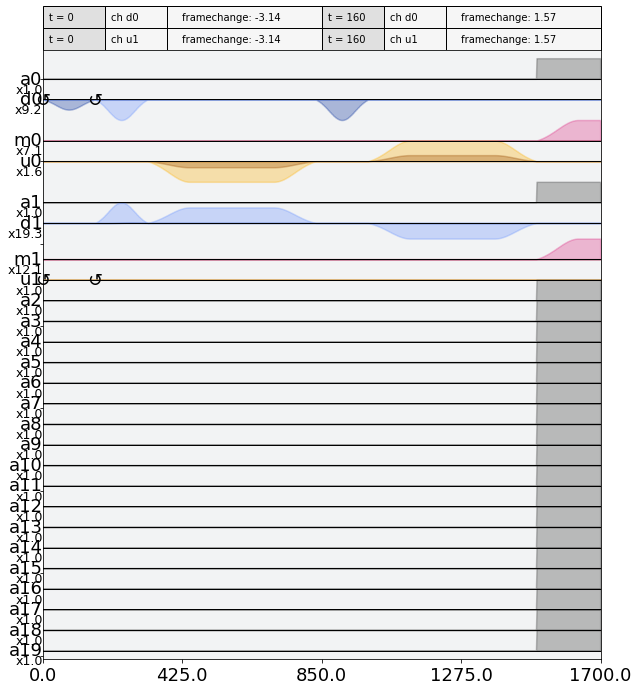

In [47]:
schedule.draw(plot_range=[0, 1700])

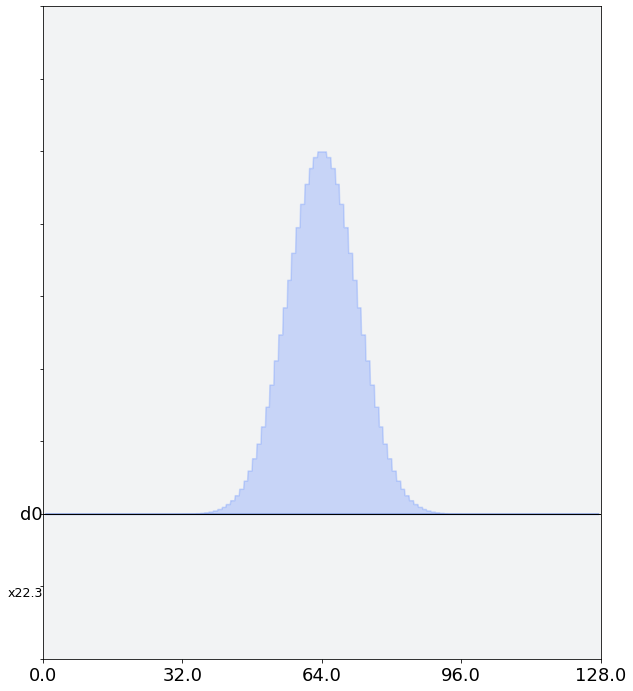

In [49]:
from qiskit.pulse import Schedule, Play, Gaussian, DriveChannel

h_q0 = Schedule(Play(Gaussian(duration=128, amp=0.045, sigma=8), DriveChannel(0)))

h_q0.draw()

In [50]:
inst_map = backend.defaults().instruction_schedule_map

In [ ]:
from qiskit import transpile, schedule as build_schedule
from qiskit.test.mock import FakeAlmaden

backend = FakeAlmaden()

In [51]:
print(inst_map)

<InstructionScheduleMap(1Q instructions:
  q0: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q1: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q2: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q3: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q4: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q5: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q6: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q7: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q8: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q9: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q10: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q11: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q12: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q13: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q14: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q15: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q16: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q17: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q18: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q19: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
Multi qubit instructions:
  (0, 1): {'cx'}
  (1, 0): {'cx'}
  (1, 2):

In [55]:
inst_map.add('h', 0, h_q0)
print(inst_map)

<InstructionScheduleMap(1Q instructions:
  q0: {'u2', 'u3', 'id', 'MEAS', 'h', 'u1', 'x'}
  q1: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q2: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q3: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q4: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q5: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q6: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q7: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q8: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q9: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q10: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q11: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q12: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q13: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q14: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q15: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q16: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q17: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q18: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q19: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
Multi qubit instructions:
  (0, 1): {'cx'}
  (1, 0): {'cx'}
  (1

In [57]:
inst_map2 = backend.defaults().instruction_schedule_map
print(inst_map2)

<InstructionScheduleMap(1Q instructions:
  q0: {'u2', 'u3', 'id', 'MEAS', 'h', 'u1', 'x'}
  q1: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q2: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q3: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q4: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q5: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q6: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q7: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q8: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q9: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q10: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q11: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q12: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q13: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q14: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q15: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q16: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q17: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q18: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q19: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
Multi qubit instructions:
  (0, 1): {'cx'}
  (1, 0): {'cx'}
  (1

In [58]:
schedule = build_schedule(circ, backend, inst_map=inst_map)

### Building Circuits with non-standard gates

In [60]:
import numpy as np

from qiskit.pulse import Play, SamplePulse, ControlChannel
from qiskit.pulse.schedule import ParameterizedSchedule

def random_pulse(duration):
    if duration < 1:
        raise ValueError("Duration cannot be less than 1.")
    return SamplePulse(np.random.random(duration))

def random_2q_gate(x):
    sched = Schedule()
    sched += Play(random_pulse(x), DriveChannel(0))
    sched += Play(random_pulse(x), ControlChannel(0))
    sched + Play(random_pulse(x), DriveChannel(1))
    return sched

my_random_2q_gate = ParameterizedSchedule(random_2q_gate, parameters=['x'])    

In [62]:
inst_map.add('my_2q', (0, 1), my_random_2q_gate)

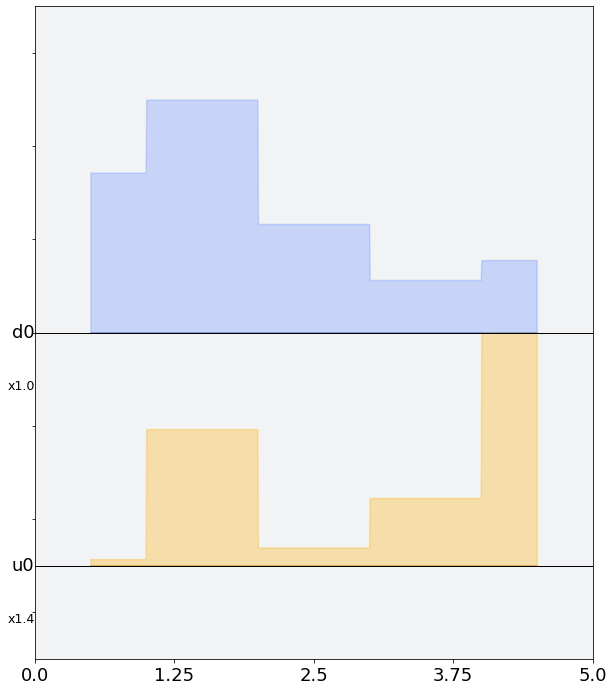

In [68]:
my_random_2q_gate(5).draw()

In [69]:
from qiskit.circuit import Gate

my_2q = Gate('my_2q', num_qubits=2, params=[100])

In [80]:
circ2 = QuantumCircuit(2, 2)
circ2.h(0)
circ2.append(my_2q, [0, 1])
circ2.h(0)
circ2.measure(0, 0)
circ2.draw()

┌───┐┌─────────────┐┌───┐┌─┐
q_0: ┤ H ├┤0            ├┤ H ├┤M├
     └───┘│  My_2q(100) │└───┘└╥┘
q_1: ─────┤1            ├──────╫─
          └─────────────┘      ║ 
c_0: ══════════════════════════╩═
                                 
c_1: ════════════════════════════

In [81]:
#inst_map.remove('h', 0)

transpiled_circ2 = transpile(circ2, coupling_map=[[0, 1]],
                          basis_gates=backend.configuration().basis_gates + ['my_2q'])
transpiled_circ2.draw()

┌──────────┐┌─────────────┐┌──────────┐┌─┐
q_0 -> 0 ┤ U2(0,pi) ├┤0            ├┤ U2(0,pi) ├┤M├
         └──────────┘│  My_2q(100) │└──────────┘└╥┘
q_1 -> 1 ────────────┤1            ├─────────────╫─
                     └─────────────┘             ║ 
    c_0: ════════════════════════════════════════╩═
                                                   
    c_1: ══════════════════════════════════════════

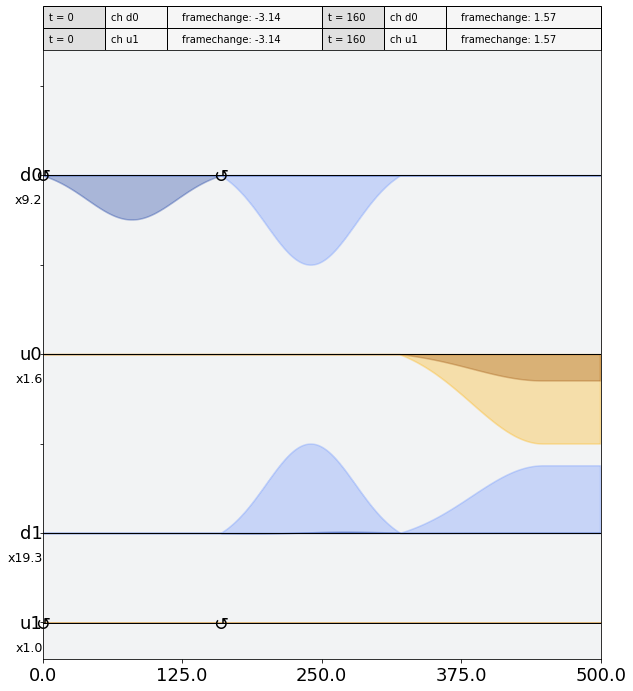

In [82]:
schedule = build_schedule(transpiled_circ, backend, inst_map=inst_map)

schedule.draw(plot_range=(0, 500))

### Scheduler Methods

In [83]:
circ = QuantumCircuit(2, 2)
circ.x(0)
circ.x(0)
circ.x(1)
circ.measure([0, 1], [0, 1])

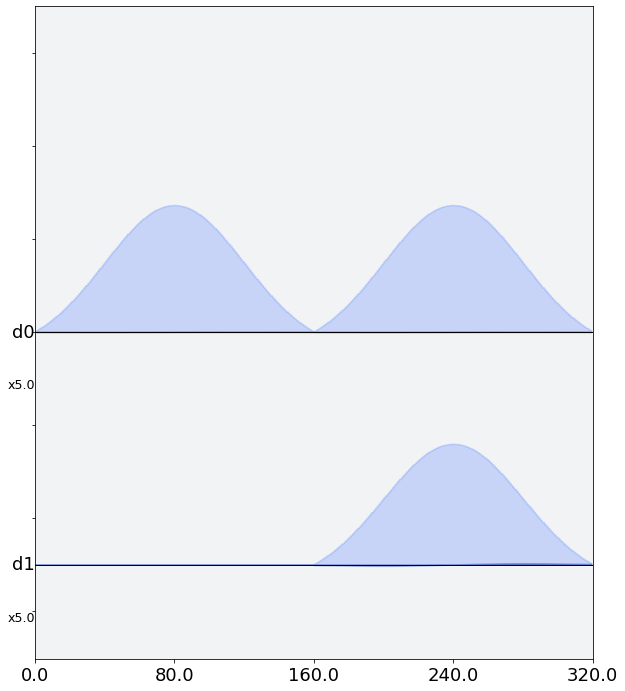

In [86]:
schedule = build_schedule(circ, backend, method="as_late_as_possible")

schedule.draw(channels_to_plot=[DriveChannel(0), DriveChannel(1)], scale=5)

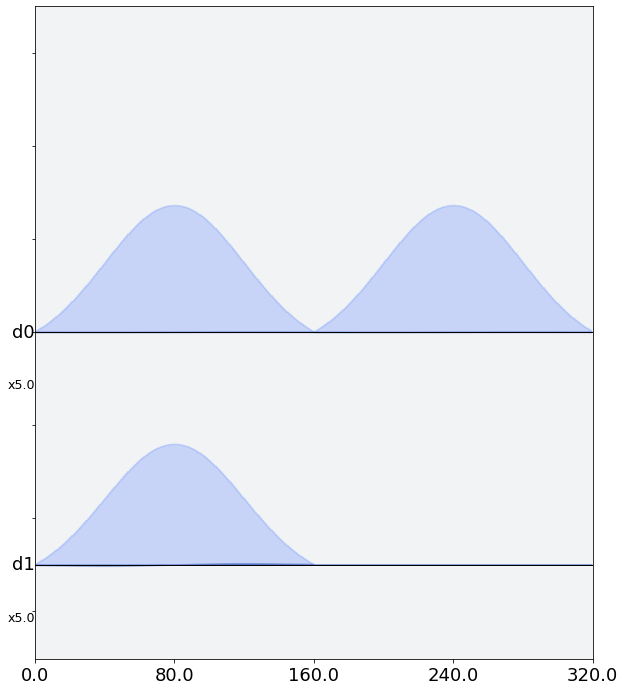

In [87]:
schedule = build_schedule(circ, backend, method="as_soon_as_possible")
schedule.draw(channels_to_plot=[DriveChannel(0), DriveChannel(1)], scale=5)

# Adding Measurements to Schedules

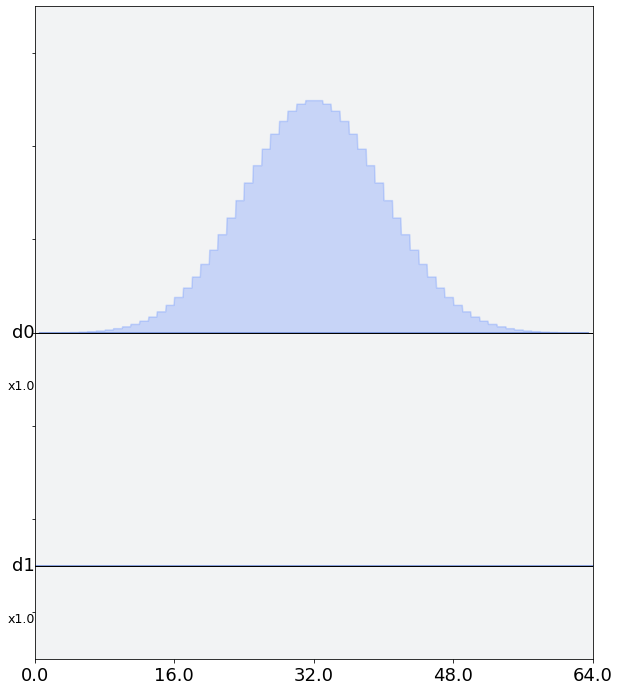

In [92]:
from qiskit.scheduler import measure
sched += measure([0, 1], backend) << sched.duration
sched.draw(channels_to_plot=[DriveChannel(0), DriveChannel(1)], scale=1)

In [94]:
from qiskit import IBMQ
from qiskit.pulse import Schedule
from qiskit.scheduler import measure_all
from qiskit.test.mock import FakeAlmaden

backend = FakeAlmaden()

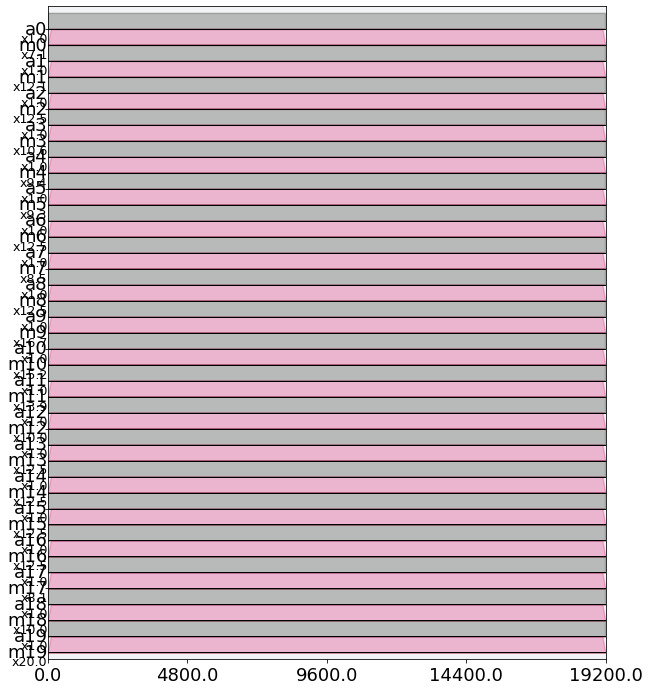

In [95]:
sched = Schedule(name="Measurement scheduling example")
sched += measure_all(backend)

sched.draw()

In [96]:
from qiskit.pulse import MeasureChannel, AcquireChannel, MemorySlot, Play, GaussianSquare, Acquire

# Duration (in number of cycles) for readout
duration = 16000

# Stimulus pulses for qubits 0 and 1
measure_tx = Play(GaussianSquare(duration=duration, amp=0.2, sigma=10, width=duration - 50),
                  MeasureChannel(0))
measure_tx += Play(GaussianSquare(duration=duration, amp=0.2, sigma=10, width=duration - 50),
                   MeasureChannel(1))

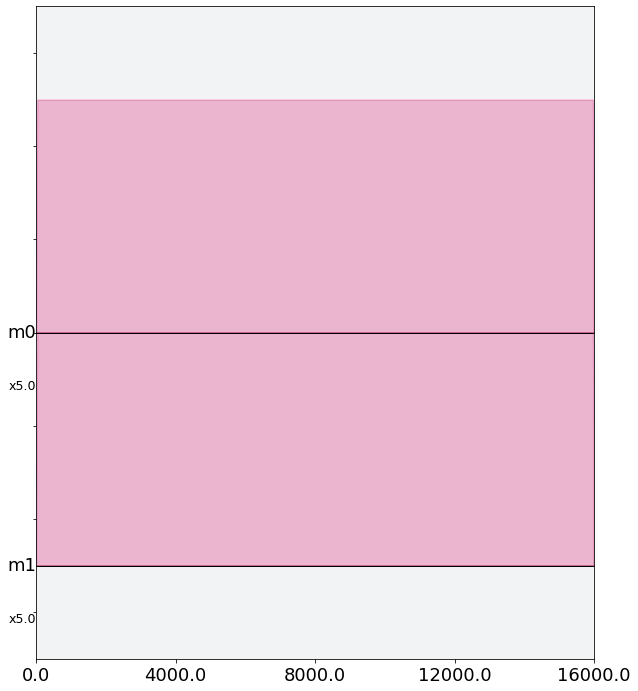

In [97]:
measure_tx.draw()

and blah blah blah... we probably won't be getting too deep into defining our own measurement procedures if we can help it...

# Obtaining Information about your backend

## Configuration

In [99]:
from qiskit.test.mock import FakeAlmaden
backend = FakeAlmaden()

In [101]:
config = backend.configuration()

# Basic Features
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called fake_almaden, and is on version 1.2.4. It has 20 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['u1', 'u2', 'u3', 'cx', 'id'].


In [102]:
# this is the timescale of waveforms
# aka the inverse sampling rate of the control rack arb waveform generator
config.dt

2.2222222222222221e-10

In [103]:
## different types of measurement output data... but tutorials are not written yet
config.meas_levels

[1, 2]

In [105]:
## sampling rate of control rack's analog-to-digital converters (ADCs)
config.dtm

2.2222222222222221e-10

In [106]:
config.meas_map

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]

In [107]:
config.drive(0)

DriveChannel(0)

In [108]:
config.measure(0)

MeasureChannel(0)

In [109]:
config.acquire(0)

AcquireChannel(0)

## Properties of qubits and stuff like that

In [110]:
props = backend.properties()

In [111]:
def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - U2 gate error of {3}\n"
          "  - U2 gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('u2', qubit),
              properties.gate_length('u2', qubit) * ns,
              properties.frequency(qubit) * GHz))

describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 113.3795751321217 microseconds
  - T2 time of 150.2847720544259 microseconds
  - U2 gate error of 0.0005295247303964942
  - U2 gate duration of 35.555555555555564 nanoseconds
  - resonant frequency of 4.8572819835984875 GHz


## Pulse Defaults (only defined for pulse-enabled backends obvs)

In [112]:
defaults = backend.defaults()

### Drive Frequencies

In [113]:
q0_freq = defaults.qubit_freq_est[0]  # Hz
q0_meas_freq = defaults.meas_freq_est[0]  # Hz

GHz = 1e-9
print("DriveChannel(0) defaults to a modulation frequency of {} GHz.".format(q0_freq * GHz))
print("MeasureChannel(0) defaults to a modulation frequency of {} GHz.".format(q0_meas_freq * GHz))

DriveChannel(0) defaults to a modulation frequency of 4.857219891603379 GHz.
MeasureChannel(0) defaults to a modulation frequency of 7.264856891000001 GHz.


### Pulse Schedule definitions for Quantum Circuit Instructions

In [115]:
inst_map = defaults.instruction_schedule_map
print(inst_map)

<InstructionScheduleMap(1Q instructions:
  q0: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q1: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q2: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q3: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q4: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q5: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q6: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q7: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q8: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q9: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q10: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q11: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q12: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q13: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q14: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q15: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q16: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q17: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q18: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
  q19: {'u2', 'u3', 'id', 'MEAS', 'u1', 'x'}
Multi qubit instructions:
  (0, 1): {'cx'}
  (1, 0): {'cx'}
  (1, 2):

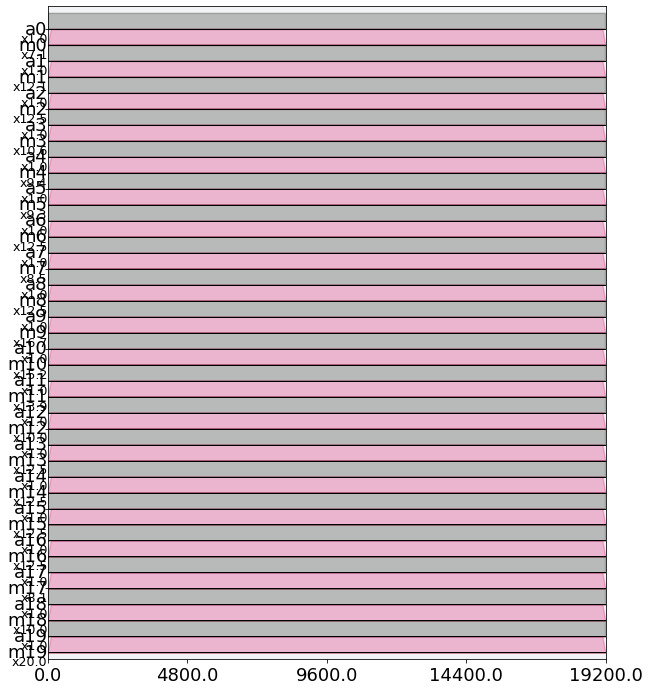

In [117]:
measure_schedule = inst_map.get('measure', [q for q in range(config.n_qubits)])
measure_schedule.draw()